In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Tail estimation with lognormal distribution

Suppose

$$
\frac{S_{t+1}}{S_{t}} = A
$$

where

- $S_t$ is the firm size at time $t$
- $\ln A \sim N(\mu, \sigma^2)$


We seek the $\alpha$ satisfying

$$
\mathbb E (A^{\alpha} ) = 1 
$$

By the expression for the mean of a lognormal distribution, with $\epsilon \sim N(0,1)$,

$$
\mathbb E (A^{\alpha} ) =  \mathbb E (\exp (\mu + \sigma \epsilon)^{\alpha} )
= \mathbb E (\exp (\mu \alpha + \sigma \epsilon \alpha) ) 
= \exp \left(  \alpha \mu + \frac{\sigma^2 \alpha^2}{2} \right)
$$


Hence we seek the $\alpha$ satisfying
$$
\exp (  \alpha \mu + \frac{\sigma^2 \alpha^2}{2} ) =1 
$$

Taking logarithm of both sides yields

$$
\alpha \mu + \frac{\sigma^2 \alpha^2}{2} =0
$$

Rearranging, we get

$$
\alpha = - \frac{2 \mu}{\sigma^2} 
$$



## Tail estimation with Laplacian distribution

Now we assume that $\ln A$ has a Laplacian distribution.

Here's a function called ``laplace`` to generate density its density

In [4]:
def laplace(x, μ, λ):
    return 0.5 * λ * np.exp(- λ * np.abs(x - μ))

Example:

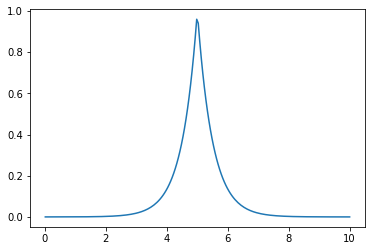

In [5]:
x_grid = np.linspace(0.01, 10, 200)
y_vals = laplace(x_grid, 5.0, 2.0)

fig, ax = plt.subplots()
plt.plot(x_grid, y_vals)
plt.show()

Let $G = \ln A$.

We seek the $\alpha$ such that $\mathbb E A^\alpha = \mathbb E \exp(\alpha G) = 1$

In other words, we seek the $\alpha$ where $m(\alpha) = 1$, where $m$ is the MGF of $G$.

We can obtain this as the MGF of the Laplacian distribution:

In [6]:
def m(α, μ=-0.02, λ=10):
    "Moment generating function, Laplace distribution"
    return np.exp(μ * α) / (1 - α**2 / λ**2)

Does there exists an $\alpha > 0$ such that $m(\alpha) = 1$?

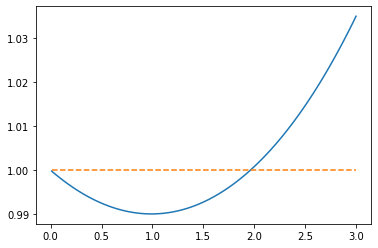

In [7]:
alpha_grid = np.linspace(0.01, 3, 100)
y_vals = m(alpha_grid)

fig, ax = plt.subplots()
plt.plot(alpha_grid, y_vals)
plt.plot(alpha_grid, np.ones_like(alpha_grid), '--')
plt.show()

For these choices of $\mu$ and $\lambda$, the value of $\alpha$ is around 1.9.

What about if $\mu$ and $\lambda$ are estimated from IID observations of the growth rate?